### Introduction and Data Source

In October 1958, a pysicist William Higginbotham created the very first video game known to exist. It was a very simple tennis game. Nowadays, video games have been so popular of all ages. As our technology expand and evolve, video games have been keeping up and are constantly being introduced through different platforms (e.g. Handheld Consoles, PCs, and etc.) Today, the gaming community has grown to an incredible amount of people with different bacgkgrounds. The rise of the "internet" has connected many communities that play together around the world. 

In this project, we will be exploring a dataset of popular video games from Kaggle.com dating from 1980 - 2023.

This data set includes data like
1. Genres
2. Rating
3. Release Date
4. Wishlist
and others.

We will be analyzing this dataset to gain insights into various aspects of the video game industry, including

- The popularity of different genres.
- The trend of games rating over time (release date).
- The level of engagement of players with games.



### Setting up before data processing

In [1]:
#importing libraries that are to be used in this project

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.listdir()

['games.csv', 'Best selling games.ipynb', '.ipynb_checkpoints']

In [3]:
#reading and inspection of the file

games = pd.read_csv('games.csv')
#file is in the same directory as the notebook
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [4]:
games.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [5]:
#to get the number of duplicated entries on the dataframe
games.duplicated().sum()

0

In [6]:
#to get the number of null values in each column
games.isnull().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

Observations on the Initial Data Inspection

1. A total of 1512 entries of data is in the dataset. 
2. There is a column named 'Unnamed: 0' which is not necessary.
3. Columns like 'Number of Reviews' used the nK format for numerical values.
4. There are no duplicate values on this dataset.
5. There are null values for the columns 'Team' and 'Rating'
6. Release data is not in Date-Time Format


In [7]:
#Dropping columns that will not be used e.g. 'Unnamed: 0'

games = games.drop(['Unnamed: 0', 'Team', 'Reviews', 'Summary', 'Number of Reviews', 'Times Listed'], axis=1)
games.head()

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022",4.5,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4.4,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015",4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",4.4,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K


In [8]:
#checking the data type of numerical data
games['Plays'].dtype

dtype('O')

In [9]:
#changing the data type of the columns with numerical values for analysis

#defining a function to replace string numerical values to float

#copy the original data
gamesCopy = games.copy()

def convertToNumeric(value):
    if 'K' in value:
        return float(value.replace('K', ''))*1000
    else:
        return int(value)

    
#apply the defined function to the dataset

games['Playing'] = gamesCopy['Playing'].apply(convertToNumeric)
games['Plays'] = gamesCopy['Plays'].apply(convertToNumeric)
games['Backlogs'] = gamesCopy['Backlogs'].apply(convertToNumeric)
games['Wishlist'] = gamesCopy['Wishlist'].apply(convertToNumeric)

games.head()

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022",4.5,"['Adventure', 'RPG']",17000.0,3800.0,4600.0,4800.0
1,Hades,"Dec 10, 2019",4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",21000.0,3200.0,6300.0,3600.0
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4.4,"['Adventure', 'RPG']",30000.0,2500.0,5000.0,2600.0
3,Undertale,"Sep 15, 2015",4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28000.0,679.0,4900.0,1800.0
4,Hollow Knight,"Feb 24, 2017",4.4,"['Adventure', 'Indie', 'Platform']",21000.0,2400.0,8300.0,2300.0


In [10]:
games.head()

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022",4.5,"['Adventure', 'RPG']",17000.0,3800.0,4600.0,4800.0
1,Hades,"Dec 10, 2019",4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",21000.0,3200.0,6300.0,3600.0
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",4.4,"['Adventure', 'RPG']",30000.0,2500.0,5000.0,2600.0
3,Undertale,"Sep 15, 2015",4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28000.0,679.0,4900.0,1800.0
4,Hollow Knight,"Feb 24, 2017",4.4,"['Adventure', 'Indie', 'Platform']",21000.0,2400.0,8300.0,2300.0


In [11]:
#dropping null values
games.dropna(inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1499 non-null   object 
 1   Release Date  1499 non-null   object 
 2   Rating        1499 non-null   float64
 3   Genres        1499 non-null   object 
 4   Plays         1499 non-null   float64
 5   Playing       1499 non-null   float64
 6   Backlogs      1499 non-null   float64
 7   Wishlist      1499 non-null   float64
dtypes: float64(5), object(3)
memory usage: 105.4+ KB


In [12]:
games['Release Date'] = pd.to_datetime(games['Release Date'])
games['Release Date'].head()

ParserError: Unknown string format: releases on TBD

In [13]:
#converting the column to datetime format produced an error due to a value of 'releases on TBD'
#since these games are not yet released we can remove them from the dataset.
condition = games['Release Date'] == 'releases on TBD'
games[condition]

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist
644,Deltarune,releases on TBD,4.3,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']",1300.0,83.0,468.0,617.0
1252,Elden Ring: Shadow of the Erdtree,releases on TBD,4.8,"['Adventure', 'RPG']",1.0,0.0,39.0,146.0


In [14]:
#to drop 'release on TBD values'
games = games.drop(games[condition].index)

In [15]:
#finally converting the release date column to datetime format
games['Release Date'] = pd.to_datetime(games['Release Date'])

In [16]:
games.head()

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,4.5,"['Adventure', 'RPG']",17000.0,3800.0,4600.0,4800.0
1,Hades,2019-12-10,4.3,"['Adventure', 'Brawler', 'Indie', 'RPG']",21000.0,3200.0,6300.0,3600.0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,4.4,"['Adventure', 'RPG']",30000.0,2500.0,5000.0,2600.0
3,Undertale,2015-09-15,4.2,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28000.0,679.0,4900.0,1800.0
4,Hollow Knight,2017-02-24,4.4,"['Adventure', 'Indie', 'Platform']",21000.0,2400.0,8300.0,2300.0


### Exploratory Data Analysis and Data Visualization

In order for us to proceed with the Exploratory Data Analysis, we need to categorize Genres per Games by doing get_dummies() method

In [17]:

games['Genres'] = games['Genres'].str.replace('[\[\]\'\"]' , "")
games['Genres'].head()

0                                Adventure, RPG
1                Adventure, Brawler, Indie, RPG
2                                Adventure, RPG
3    Adventure, Indie, RPG, Turn Based Strategy
4                    Adventure, Indie, Platform
Name: Genres, dtype: object

In [18]:
genres = games['Genres'].str.get_dummies(",")

In [19]:
genres.head()

,Arcade,Brawler,Card & Board Game,Fighting,Indie,Music,Pinball,Platform,Point-and-Click,Puzzle,...,Point-and-Click,Puzzle,RPG,Racing,Real Time Strategy,Shooter,Simulator,Sport,Strategy,Visual Novel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
topGenres = genres.sum().sort_values(ascending=False)

In [21]:
topGenres.head(10)

Adventure               1005
 RPG                     422
 Platform                282
 Shooter                 270
 Indie                   229
 Puzzle                  163
 Strategy                141
 Brawler                 119
 Simulator               109
 Turn Based Strategy      99
dtype: int64

#### Top 10 Game Genres

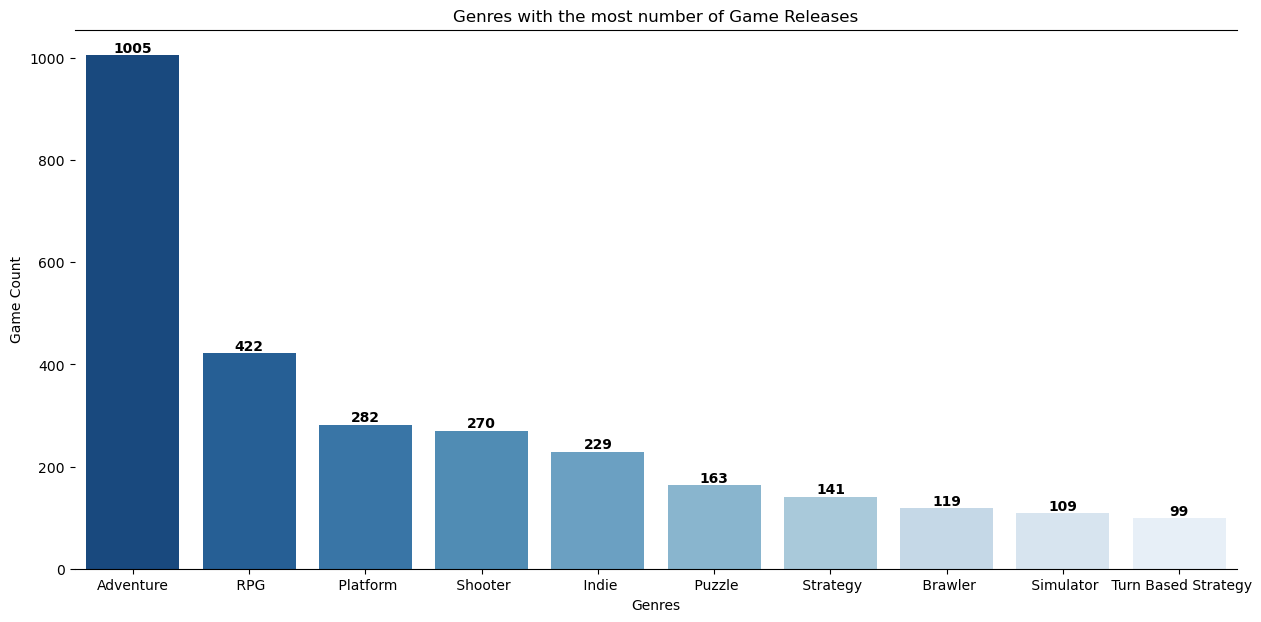

In [48]:
#setting up the figure size
plt.figure(figsize=(15,7))

#plotting the barchart on the figure
ax = sns.barplot(x=topGenres[:10].index, y=topGenres[:10].values, palette='Blues_r')

#for labeling the count values of each genre in their own each bins
#i means index and v means values
for i, v in enumerate(topGenres[:10].values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.ylabel('Game Count')
plt.xlabel('Genres')
plt.title('Genres with the most number of Game Releases')

sns.despine(top=False, bottom=False, right=True, left=True)

#### Most Popular Game in each Genre

In [23]:
#to get the most popular game in each genre

#1. topGenres series need to be converted to dataFrame inorder for it to merge into the bigger data frame later on.
topGenresR1 = topGenres.to_frame(name='topGenres')

In [24]:
topGenresR1.head(10)

,topGenres
Adventure,1005
RPG,422
Platform,282
Shooter,270
Indie,229
Puzzle,163
Strategy,141
Brawler,119
Simulator,109
Turn Based Strategy,99


In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         1497 non-null   object        
 1   Release Date  1497 non-null   datetime64[ns]
 2   Rating        1497 non-null   float64       
 3   Genres        1497 non-null   object        
 4   Plays         1497 non-null   float64       
 5   Playing       1497 non-null   float64       
 6   Backlogs      1497 non-null   float64       
 7   Wishlist      1497 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 105.3+ KB


In [26]:
gamesR1 = games.merge(topGenresR1, left_on='Genres', right_index=True)
gamesR1

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist,topGenres
45,Doom,2016-05-12,4.0,Shooter,18000.0,541.0,4000.0,1400.0,81
53,Doom Eternal,2020-03-19,4.2,Shooter,12000.0,738.0,4600.0,2400.0,81
57,Overwatch 2,2022-10-04,2.7,Shooter,6600.0,1100.0,292.0,171.0,81
58,Resident Evil 4,2005-01-11,4.3,Shooter,14000.0,360.0,3000.0,1200.0,81
83,Half-Life 2,2004-11-16,4.2,Shooter,15000.0,257.0,3500.0,1000.0,81
...,...,...,...,...,...,...,...,...,...
1324,WarioWare: Smooth Moves,2006-12-02,3.9,Puzzle,3100.0,7.0,256.0,189.0,11
1351,Microsoft Minesweeper,1990-10-08,3.2,Puzzle,2400.0,15.0,28.0,6.0,11
1355,Peggle,2007-02-27,3.6,Puzzle,2500.0,20.0,122.0,35.0,11
1385,Scribblenauts,2009-09-15,3.2,Puzzle,3200.0,3.0,155.0,80.0,11


In [27]:
groupedGames = gamesR1.groupby('Genres')
groupedGames.head()

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist,topGenres
45,Doom,2016-05-12,4.0,Shooter,18000.0,541.0,4000.0,1400.0,81
53,Doom Eternal,2020-03-19,4.2,Shooter,12000.0,738.0,4600.0,2400.0,81
57,Overwatch 2,2022-10-04,2.7,Shooter,6600.0,1100.0,292.0,171.0,81
58,Resident Evil 4,2005-01-11,4.3,Shooter,14000.0,360.0,3000.0,1200.0,81
83,Half-Life 2,2004-11-16,4.2,Shooter,15000.0,257.0,3500.0,1000.0,81
...,...,...,...,...,...,...,...,...,...
1324,WarioWare: Smooth Moves,2006-12-02,3.9,Puzzle,3100.0,7.0,256.0,189.0,11
1351,Microsoft Minesweeper,1990-10-08,3.2,Puzzle,2400.0,15.0,28.0,6.0,11
1355,Peggle,2007-02-27,3.6,Puzzle,2500.0,20.0,122.0,35.0,11
1385,Scribblenauts,2009-09-15,3.2,Puzzle,3200.0,3.0,155.0,80.0,11


In [28]:
#after grouping the games into their own genres
#let's get the most popular game in according to their genre by the code below.

most_popular_game = groupedGames.apply(lambda x: x.loc[x["topGenres"].idxmax()])

most_popular_game[['Title']]

,Title
Genres,
Adventure,Metal Gear Solid 2: Sons of Liberty
Arcade,Chrome Dino
Brawler,Devil May Cry
Card & Board Game,Mario Party Superstars
Fighting,MultiVersus
Indie,Friday the 13th: The Game
MOBA,Pokémon Unite
Music,Friday Night Funkin'
Platform,Super Mario Bros. 3


#### Average Game Rating Per Year

In [29]:
#x - year
# year - average rating

In [30]:
games['releasedYear'] = games['Release Date'].dt.year

In [31]:
games['releasedYear'].head()

0    2022
1    2019
2    2017
3    2015
4    2017
Name: releasedYear, dtype: int64

In [32]:
meanRating = games.groupby('releasedYear')['Rating'].mean().reset_index()
meanRating.head()

,releasedYear,Rating
0,1980,3.400000
1,1982,3.600000
2,1985,3.500000
3,1986,3.275000
4,1987,2.766667


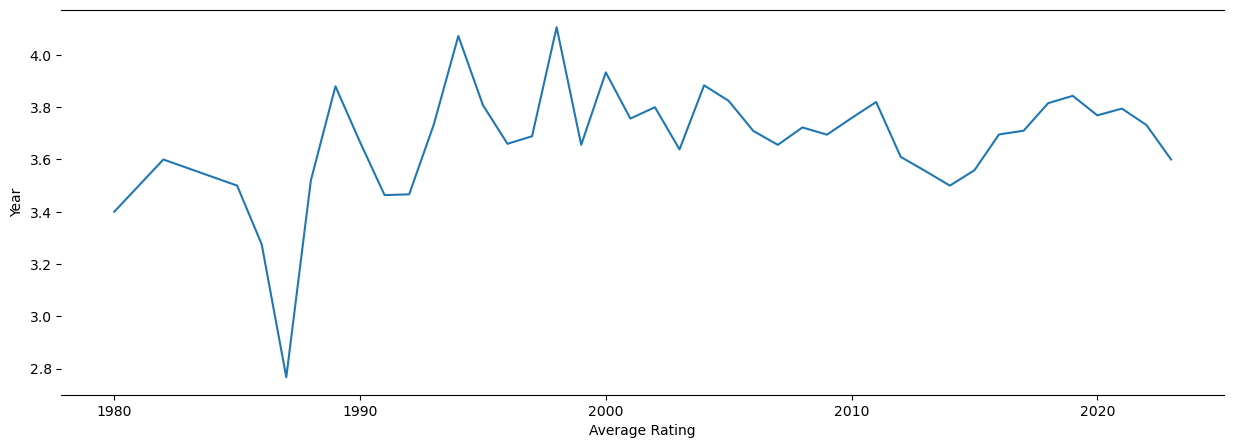

In [33]:
#setting up the figure
plt.figure(figsize=(15,5))

#plotting the figure
ax2 = sns.lineplot(data=meanRating, x='releasedYear', y='Rating')

plt.xlabel('Average Rating')
plt.ylabel('Year')

sns.despine(top=False, left=True, right=True, bottom=False)

plt.show()

#### Top Games with Highest Engagement

In [34]:
#Highest Engagement means
# plays - number of plays
# playing - active players

In [35]:
#zeroEngagements - no active players playing that game

engagements = games[games['Playing'] != 0] #returns a dataframe since games['Playing'] != 0 only returns boolean values
engagements.head()


,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist,releasedYear
0,Elden Ring,2022-02-25,4.5,"Adventure, RPG",17000.0,3800.0,4600.0,4800.0,2022
1,Hades,2019-12-10,4.3,"Adventure, Brawler, Indie, RPG",21000.0,3200.0,6300.0,3600.0,2019
2,The Legend of Zelda: Breath of the Wild,2017-03-03,4.4,"Adventure, RPG",30000.0,2500.0,5000.0,2600.0,2017
3,Undertale,2015-09-15,4.2,"Adventure, Indie, RPG, Turn Based Strategy",28000.0,679.0,4900.0,1800.0,2015
4,Hollow Knight,2017-02-24,4.4,"Adventure, Indie, Platform",21000.0,2400.0,8300.0,2300.0,2017


In [36]:
engagements['avgPlayers'] = round(engagements['Plays'] / engagements['Playing'])
engagements = engagements.sort_values(by='avgPlayers', ascending=False)

engagements.head()

,Title,Release Date,Rating,Genres,Plays,Playing,Backlogs,Wishlist,releasedYear,avgPlayers
1331,Fruit Ninja Classic,2010-04-20,2.7,Arcade,3800.0,1.0,32.0,10.0,2010,3800.0
1476,Slither.io,2016-03-25,2.2,"Arcade, Simulator",2100.0,1.0,21.0,4.0,2016,2100.0
1189,Happy Wheels,2010-06-04,2.8,"Adventure, Platform, Racing",5100.0,3.0,61.0,21.0,2010,1700.0
1454,Ms. Pac-Man,1982-02-03,3.6,Arcade,1600.0,1.0,45.0,38.0,1982,1600.0
1499,WWE SmackDown vs. Raw 2008,2007-11-09,3.1,"Fighting, Sport",1400.0,1.0,34.0,16.0,2007,1400.0


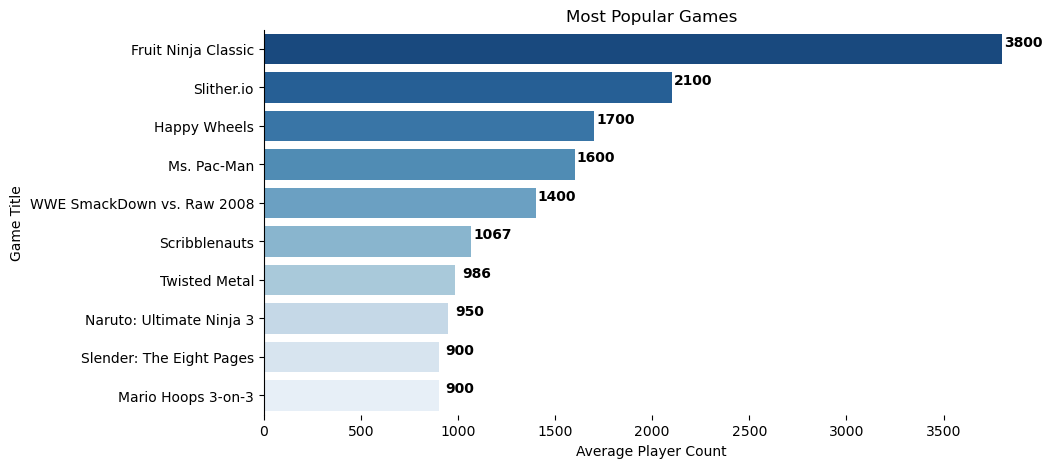

In [47]:
#setting up the figure size
fig, ax = plt.subplots(figsize=(10,5))

#plotting the barchart on the figure
ax = sns.barplot(data=engagements.head(10), x='avgPlayers', y='Title', palette='Blues_r')

for i, v in enumerate(engagements['avgPlayers'].head(10).values):
    #topGenre[:10].values):
    ax.text(v+220/2, i, str(round(v)), ha='center', va='bottom', fontweight='bold')


plt.ylabel('Game Title')
plt.xlabel('Average Player Count')
plt.title('Most Popular Games')

sns.despine(top=True, bottom=True, right=True, left=False)

#### Correlations
##### Quick View on Correlations between Columns

In [49]:
corr_games = games.corr()

<AxesSubplot:>

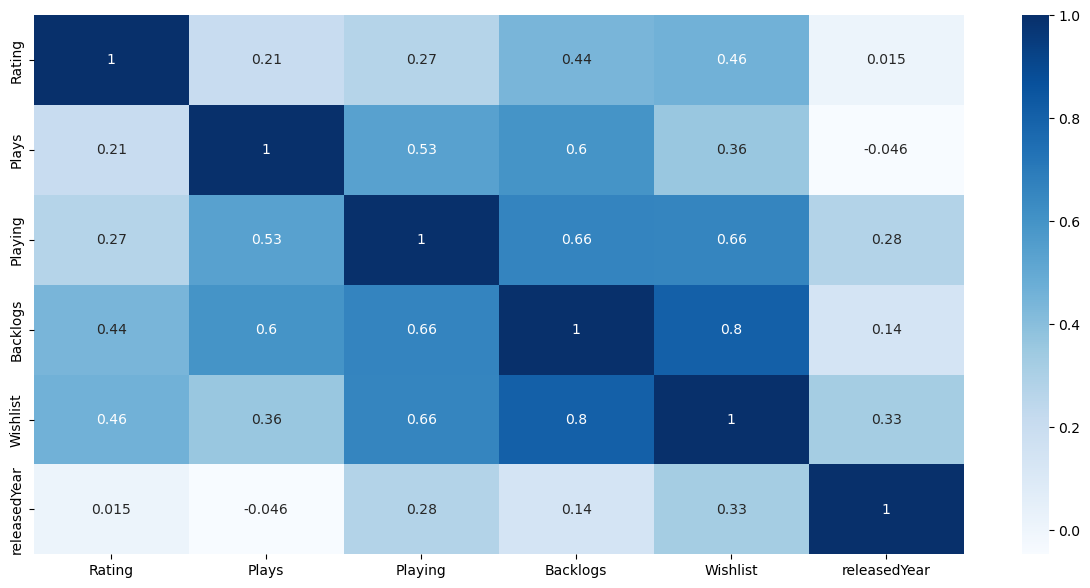

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data=corr_games, annot=True, cmap='Blues', ax=ax)

In [71]:
wishlistXbacklogs = games.groupby('Wishlist')['Backlogs'].mean().reset_index()
wishlistXbacklogs.columns = ['Wishlist', 'Ave_Backlogs']

wishlistXbacklogs

,Wishlist,Ave_Backlogs
0,2.0,9.0
1,3.0,6.0
2,4.0,13.0
3,5.0,26.0
4,6.0,28.0
...,...,...
562,3400.0,3650.0
563,3600.0,6250.0
564,3700.0,4100.0
565,3800.0,4500.0


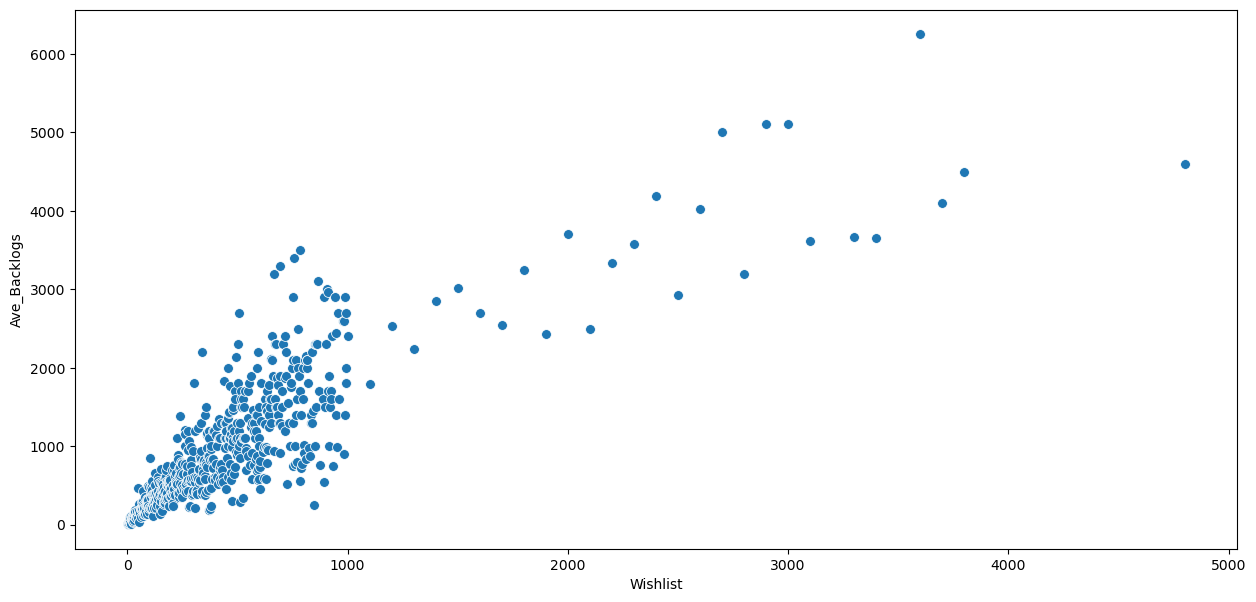

In [74]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.scatterplot(data=wishlistXbacklogs, x='Wishlist', y='Ave_Backlogs', s=50)

plt.show()

### Findings

1. The genre with most number of games released since the covered time period is Adventure with 1005 games produce with its most popular game "Metal Gear Solid 2: Sons of Liberty" compared to the second in line which is RPG which only has 422 games produced with it's most popular game "Xenobade Chronicles: Definitive Edition".

2. There was a great decline in game ratings during the period 1980 - 1990, but it became more stable during the 1990's to the Present.

3. The game with the most number of engagements according to our dataset was the Fruit Ninja Classic with an average of 3800 plays per player and Slither.io with 2100 plays per player. As we can see both of these games can be played on Mobile Phones which is the most accessible handheld device at the time of this study.

4. There's a big correlation between Wishlist and Backlogs.